# Linear KCCA Verification

In [1]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from multiview.embed.kcca import KCCA
from multiview.embed.gcca import GCCA

import matplotlib.pyplot as plt

# Initialize number of samples
nSamples = 1000

# Define two latent variables (number of samples x 1)
latvar1 = np.random.randn(nSamples,)
latvar2 = np.random.randn(nSamples,)

# Define independent components for each dataset (number of observations x dataset dimensions)
indep1 = np.random.randn(nSamples, 4)
indep2 = np.random.randn(nSamples, 5)

# Create two datasets, with each dimension composed as a sum of 75% one of the latent variables and 25% independent component
data1 = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
data2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Split each dataset into two halves: training set and test set
train1 = data1[:nSamples//2]
train2 = data2[:nSamples//2]
test1 = data1[nSamples//2:]
test2 = data2[nSamples//2:]

In [2]:
kcca_l = KCCA(ktype ="linear", reg = 0.001, n_components = 4)
kcca_lt = KCCA(ktype ="linear", reg = 0.001, n_components = 4)

# Use the fit.transform method to find a kCCA mapping between the two training sets.
ft = kcca_l.fit_transform([train1, train2])

# Use the validate() method to test how well the CCA mapping generalizes to the test data.
# For each dimension in the test data, correlations between predicted and actual data are computed.
weights = kcca_lt.fit([train1, train2])
test = kcca_lt.transform([test1, test2])
testcomps = test.components_
testcorr = test.cancorrs_

validate_corrs = kcca_lt.validate([test1, test2])


In [8]:
validate_corrs

[array([0.90237454, 0.90228702, 0.90969034, 0.91158366]),
 array([0.88834165, 0.89432216, 0.91945234, 0.88562686, 0.88436523])]

In [5]:
ft.weights_

[array([[ 14.3752888 ,  -6.56922631,   6.37634793, -58.66280906],
        [ -5.29819685, -13.58295819, -56.13214637,  -5.9268117 ],
        [ 14.52002365,  -4.74749084,  -6.7026884 ,  58.76988957],
        [ -5.81995891, -15.56465709,  55.46622719,   6.76196995]]),
 array([[ 12.98505873,  -4.89532334,  53.73247546, -42.08952466],
        [ -7.30460774, -21.28035532, -42.69653947, -60.30299011],
        [ 14.77253366,  -5.28637683,  14.26288796,  -0.7252967 ],
        [ -8.91459996, -21.28377432,  41.64777581,  60.87610973],
        [ 14.82441502,  -6.83979045, -66.18779349,  43.74829686]])]

In [6]:
weights

[array([[ 14.3752888 ,  -6.56922631,   6.37634793, -58.66280906],
        [ -5.29819685, -13.58295819, -56.13214637,  -5.9268117 ],
        [ 14.52002365,  -4.74749084,  -6.7026884 ,  58.76988957],
        [ -5.81995891, -15.56465709,  55.46622719,   6.76196995]]),
 array([[ 12.98505873,  -4.89532334,  53.73247546, -42.08952466],
        [ -7.30460774, -21.28035532, -42.69653947, -60.30299011],
        [ 14.77253366,  -5.28637683,  14.26288796,  -0.7252967 ],
        [ -8.91459996, -21.28377432,  41.64777581,  60.87610973],
        [ 14.82441502,  -6.83979045, -66.18779349,  43.74829686]])]

In [23]:
#Gcca comparison
gcca = GCCA()
Xs_latents1 = gcca.fit_transform([train1, train2], n_components=4)
test = gcca.transform([test1, test2], view_idx=0)
len(test)


500

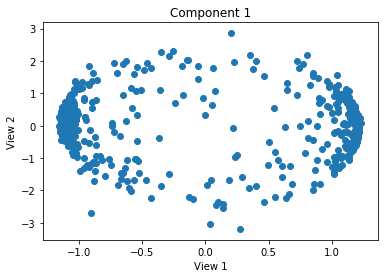

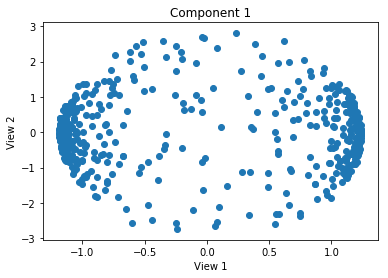

In [17]:
fig = plt.figure()
plt.scatter(Xs_latents1[0][:,0],Xs_latents1[0][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(Xs_latents1[1][:,0],Xs_latents1[1][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')


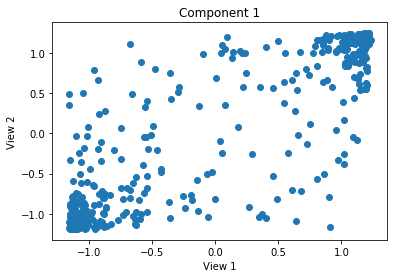

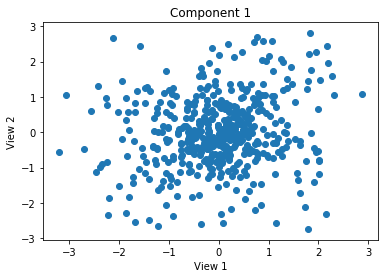

In [18]:
fig = plt.figure()
plt.scatter(Xs_latents1[0][:,0],Xs_latents1[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(Xs_latents1[0][:,1],Xs_latents1[1][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

In [4]:
print('''The canonical correlations are:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f
'''% tuple(kcca_l.cancorrs_))

The canonical correlations are:

Dimension 1: 0.96

Dimension 2: 0.95

Dimension 3: 0.10

Dimension 4: 0.02



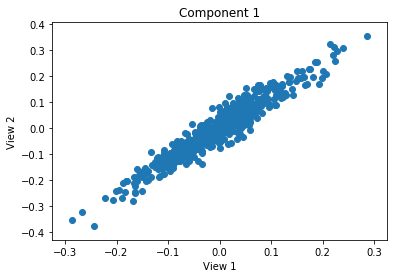

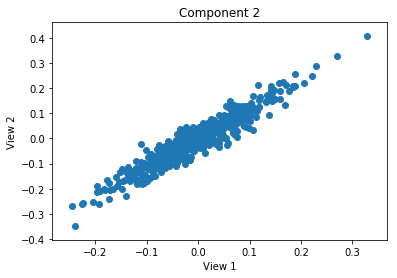

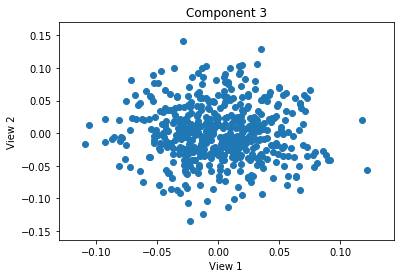

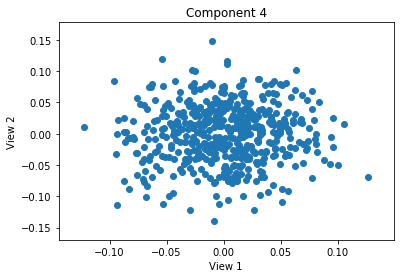

In [3]:
# Plotting same components of two views
fig = plt.figure()
plt.scatter(ft.components_[0][:,0],ft.components_[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(ft.components_[0][:,1],ft.components_[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(ft.components_[0][:,2],ft.components_[1][:,2])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(ft.components_[0][:,3],ft.components_[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')

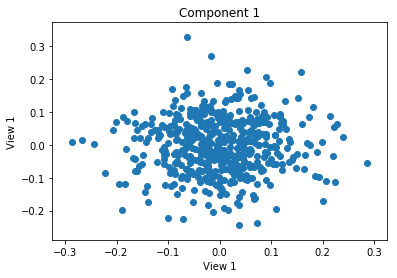

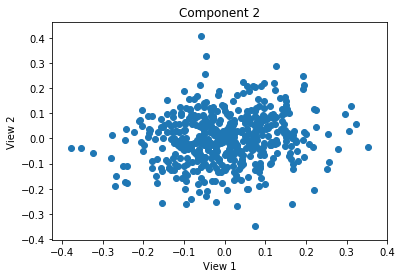

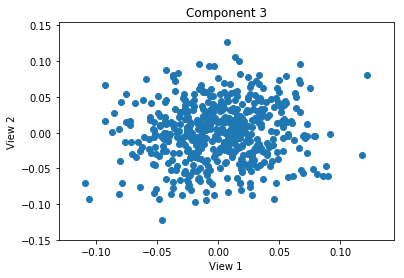

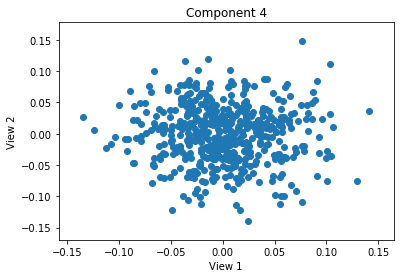

In [4]:
fig = plt.figure()
plt.scatter(ft.components_[0][:,0],ft.components_[0][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 1')

fig = plt.figure()
plt.scatter(ft.components_[1][:,0],ft.components_[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(ft.components_[0][:,2],ft.components_[0][:,3])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(ft.components_[1][:,2],ft.components_[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')

In [22]:
print('''The prediction accuracy for the first dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
'''% tuple(testcorrs[0]))
print('''The prediction accuracy for the second dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
Dimension 5: %.02f
'''% tuple(testcorrs[1]))

NameError: name 'testcorrs' is not defined

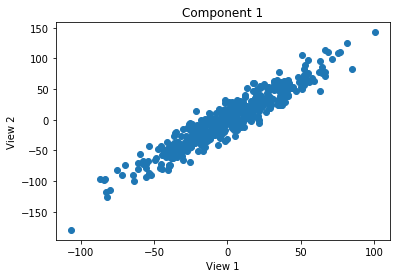

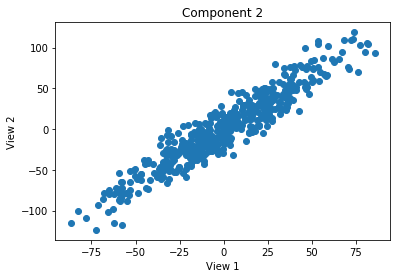

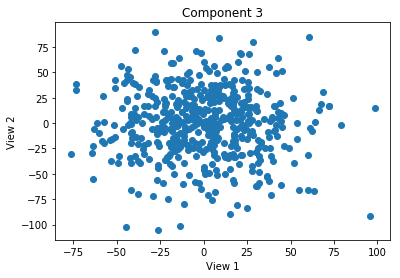

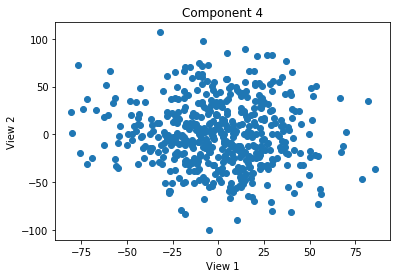

In [13]:
plt.scatter(testcomps[0][:,0],testcomps[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(testcomps[0][:,1],testcomps[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(testcomps[0][:,2],testcomps[1][:,2])
plt.title('Component 3')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(testcomps[0][:,3],testcomps[1][:,3])
plt.title('Component 4')
plt.xlabel('View 1')
plt.ylabel('View 2')

Linear kcca works because we were able to derive the linear relationship between the two views. This is shown by using the canonical weights derived from the training data on the testing data. We see that the accuracy of the model on the training data is at least 87% for each of the dimensions, which proves that linear kcca works.